Monday, 28th October 2019 -- Biko Pougala

This notebook is concerned with generate cumulative distribution functions, both Gaussian and Poisson, that could be used in order to generate copulas.

In [1]:
from scipy.stats import multivariate_normal, norm, poisson
import numpy as np
import matplotlib.pyplot as plt

What we wish to accomplish is generate a Gaussian copula from artificially generated data. In order to do that we'll follow the following steps:

1) Generate a multivariate normal distribution  
2) Get the cumulative distribution at every point  
3) Get the inverse of the CDF to get the points X 

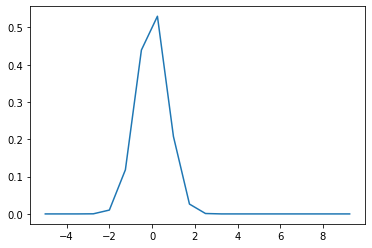

In [2]:
#Generate the multivariate normal distribution using SciPy

x = np.linspace(-5, 10, 20, endpoint=False)
y = multivariate_normal.pdf(x, mean=0, cov=0.5)
plt.plot(x, y)

In [28]:
# Generate the multivariate normal distribution using Numpy (multidimensional case)
mean = [0, 0]
cov = np.array([[1, 0.5, 3], [0.5, 1, 3]])
print(cov.shape[1])
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')

3


ValueError: cov must be 2 dimensional and square

In [4]:
# Step 2: Compute the CDF using scipy.stats
v = norm()
stats_x_cdf = v.cdf(x)
stats_y_cdf = v.cdf(y)

print(stats_x_cdf)

[0.8567859  0.76716458 0.7779361  ... 0.41776721 0.67673226 0.41340915]


Following the MATLAB documentation for generating multivariate random data with deep and complex dependencies between each other, we start by generating 1000 random data points drawn from a normal distribution with parameters 0 and 1. 

In [5]:
arr = np.random.normal(0, 1, 10000)

Plotting a histogram of the generated points gives:

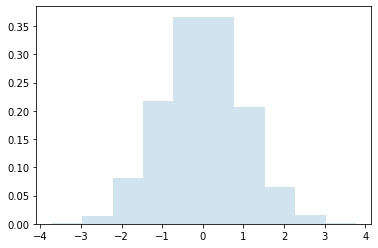

In [6]:
fig, ax = plt.subplots(1, 1)
ax.hist(arr, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

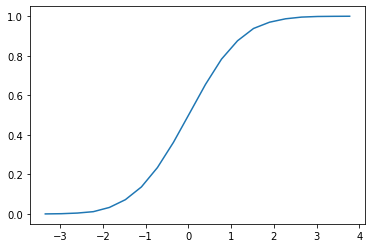

In [7]:
# Computing the CDF visually using numpy and matplotlib
num_bins = 20
counts, bin_edges = np.histogram (arr, bins=num_bins)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

There are 2 ways to compute the cumulative distribution function of a probability distribution. This prompts an analytical approach to compare the two and determine which one is the optimal one in our case. For now, I choose to use the approach using Matplotlib as it directly uses the mathematical definition of a CDF instead of a built-in Python method. 
The next step is to generate the inverse CDF of the Poisson and apply it to the normal distributions. 

[[3. 2. 2. ... 1. 2. 1.]
 [0. 2. 2. ... 0. 0. 0.]]


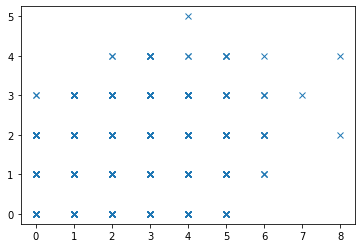

In [14]:
poiss_x = np.array(poisson.ppf(stats_x_cdf, 1.5))
poiss_y = np.array(poisson.ppf(stats_y_cdf, 0.6))
arr_poisson = np.zeros((2,5000))
arr_poisson[0] = poiss_x
arr_poisson[1] = poiss_y
print(arr_poisson)
plt.plot(poiss_x, poiss_y, 'x')
#print("Shape of the X found: " + str(arr_poisson.shape))

This is satisfying, less package it into a Python function and then call it:

In [15]:
def generatePoints(mean, cov):
    shape = mean.shape[0]
    y = np.random.multivariate_normal(mean, cov, shape).T
    v = norm()
    stats_cdf = v.cdf(y)
    mean_val = np.mean(stats_cdf)
    poiss = poisson.ppf(stats_cdf, mean_val)
    arr_poisson = np.array(poiss)
    return arr_poisson

In [16]:
from scipy import random, linalg
matrixSize = 100
temp_cov = random.randint(30, size=(matrixSize,matrixSize)) 
cov_matrix = np.dot(temp_cov,temp_cov.transpose())
mean_arr = random.randint(30, size=(matrixSize,)) 
generatePoints(mean_arr, cov_matrix)

array([[inf, inf, -1., ..., inf,  0., -1.],
       [inf, inf, -1., ..., inf, -1.,  0.],
       [inf, inf, -1., ..., inf, -1.,  2.],
       ...,
       [inf, inf, -1., ..., inf, -1., -1.],
       [inf, -1., -1., ..., inf,  0., -1.],
       [inf,  0., -1., ..., inf, -1.,  0.]])

In [17]:
matrixSize = 100
temp_cov = random.randn(matrixSize,matrixSize) # populates array with random floats from standard normal dist.
cov_matrix = np.dot(temp_cov,temp_cov.transpose())
mean_arr = random.randn(matrixSize,) 
generatePoints(mean_arr, cov_matrix)

array([[ 0.,  1.,  0., ..., inf,  0.,  0.],
       [inf, inf,  0., ...,  5.,  5.,  2.],
       [12.,  0.,  0., ...,  6.,  0.,  0.],
       ...,
       [ 0.,  0., inf, ..., inf,  0.,  0.],
       [14.,  0.,  2., ...,  0., inf,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.]])

In [18]:
matrixSize = 100
temp_cov = random.rand(matrixSize,matrixSize) # populates array uniformly with random floats between 0 and 1
cov_matrix = np.dot(temp_cov,temp_cov.transpose())
mean_arr = random.rand(matrixSize,) 
generatePoints(mean_arr, cov_matrix)

array([[5., 0., 4., ..., 1., 1., 0.],
       [0., 0., 8., ..., 1., 1., 0.],
       [0., 0., 7., ..., 0., 2., 0.],
       ...,
       [0., 0., 9., ..., 0., 2., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [1., 0., 2., ..., 1., 0., 0.]])

[[3. 2. 4. ... 2. 6. 1.]
 [4. 2. 3. ... 4. 8. 4.]]


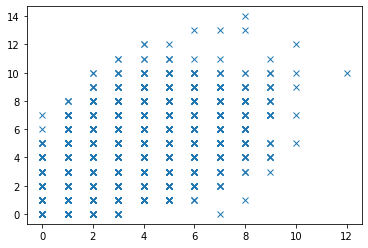

In [42]:
%matplotlib inline
cov = np.array([[1, 0.5], [0.5, 1]])
cp_ = CopulaGenerator()
copula_ = cp_.Gaussian(cov)
print(copula_)
plt.plot(copula_[0], copula_[1], 'x')

In [31]:
from CopulaGenerator import CopulaGenerator 

In [37]:
cov = np.array([[1, 0.5, 1], [0.5, 1, 0.5], [1, 0.5, 1]])
cp = CopulaGenerator()
copula = cp.Gaussian(cov)
print(copula)

[[3. 3. 3. ... 2. 3. 4.]
 [5. 2. 5. ... 3. 4. 6.]
 [5. 5. 5. ... 4. 6. 6.]]


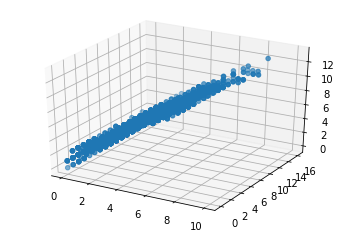

In [40]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(copula[0], copula[1], copula[2], cmap='hsv');
plt.show()